In [1]:
pip install pandas numpy matplotlib seaborn scikit-learn joblib


[notice] A new release of pip is available: 24.0 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.preprocessing import LabelEncoder
import joblib

In [4]:
# Define the path to the Excel file
file_path = r"C:\Users\Muskan Gupta\Desktop\ChurnAnalysis\db_Churn_data.xlsx"

In [5]:
sheet_name = "dbo_vw_ChurnData"

In [6]:
data = pd.read_excel(file_path, sheet_name=sheet_name)

In [7]:
print(data.head())

  Customer_ID  Gender  Age Married           State  Number_of_Referrals  \
0   11098-MAD  Female   30     Yes  Madhya Pradesh                    0   
1   11114-PUN    Male   51      No          Punjab                    5   
2   11167-WES  Female   43     Yes     West Bengal                    3   
3   11179-MAH    Male   35      No     Maharashtra                   10   
4   11180-TAM    Male   75     Yes      Tamil Nadu                   12   

   Tenure_in_Months Value_Deal Phone_Service Multiple_Lines  ...  \
0                31     Deal 1           Yes             No  ...   
1                 9     Deal 5           Yes             No  ...   
2                28     Deal 1           Yes            Yes  ...   
3                12        NaN           Yes             No  ...   
4                27     Deal 2           Yes             No  ...   

    Payment_Method Monthly_Charge Total_Charges Total_Refunds  \
0  Bank Withdrawal      95.099998   6683.399902          0.00   
1  Bank Wi

In [8]:
data = data.drop(['Customer_ID', 'Churn_Category', 'Churn_Reason'], axis=1)

In [10]:
# List of columns to be label encoded
columns_to_encode = [
    'Gender', 'Married', 'State', 'Value_Deal', 'Phone_Service', 'Multiple_Lines',
    'Internet_Service', 'Internet_Type', 'Online_Security', 'Online_Backup',
    'Device_Protection_Plan', 'Premium_Support', 'Streaming_TV', 'Streaming_Movies',
    'Streaming_Music', 'Unlimited_Data', 'Contract', 'Paperless_Billing',
    'Payment_Method'
]

In [11]:
# Encode categorical variables except the target variable
label_encoders = {}
for column in columns_to_encode:
    label_encoders[column] = LabelEncoder()
    data[column] = label_encoders[column].fit_transform(data[column])

In [12]:
# Manually encode the target variable 'Customer_Status'
data['Customer_Status'] = data['Customer_Status'].map({'Stayed': 0, 'Churned': 1})

In [13]:
# Split data into features and target
X = data.drop('Customer_Status', axis=1)
y = data['Customer_Status']

In [14]:
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [16]:
# Initialize the Random Forest Classifier
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model
rf_model.fit(X_train, y_train)

,n_estimators,100
,criterion,'gini'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [17]:
# Make predictions
y_pred = rf_model.predict(X_test)

In [18]:
# Evaluate the model
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

Confusion Matrix:
[[799  55]
 [117 231]]

Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.94      0.90       854
           1       0.81      0.66      0.73       348

    accuracy                           0.86      1202
   macro avg       0.84      0.80      0.82      1202
weighted avg       0.85      0.86      0.85      1202



In [19]:
# Feature Selection using Feature Importance
importances = rf_model.feature_importances_
indices = np.argsort(importances)[::-1]

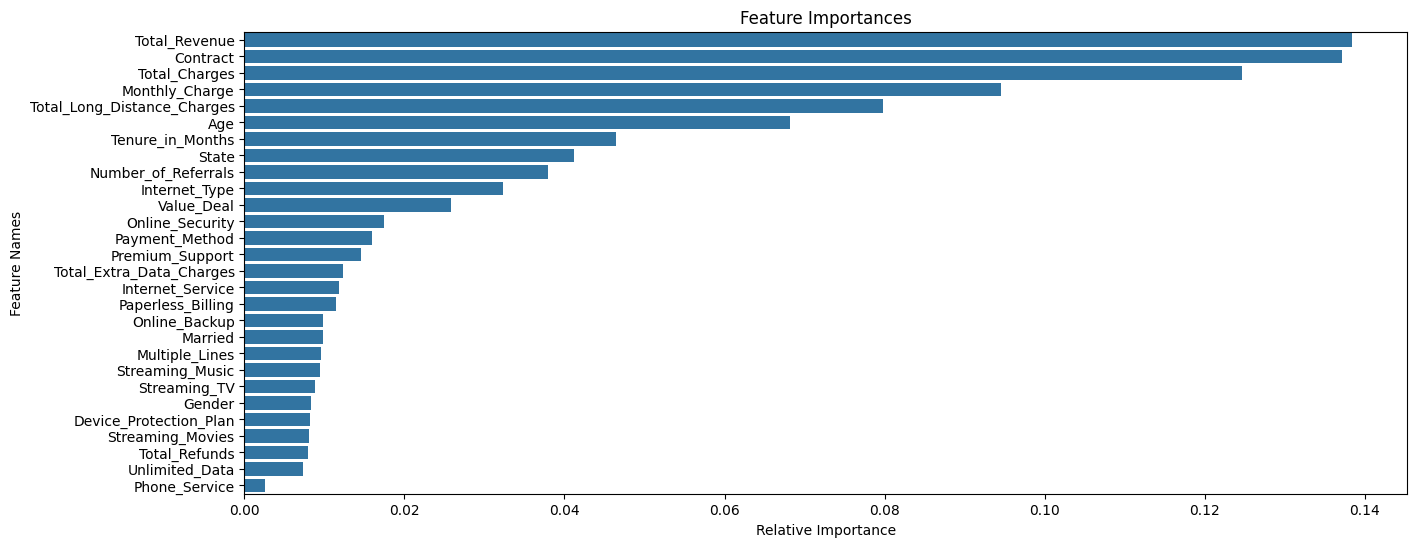

In [20]:

# Plot the feature importances
plt.figure(figsize=(15, 6))
sns.barplot(x=importances[indices], y=X.columns[indices])
plt.title('Feature Importances')
plt.xlabel('Relative Importance')
plt.ylabel('Feature Names')
plt.show()

### Use Model for Prediction on New Data

In [21]:
# Define the path to the Excel file
file_path = r"C:\Users\Muskan Gupta\Desktop\ChurnAnalysis\db_Churn_data.xlsx"

In [22]:
sheet_name = "dbo_vw_JoinData"

In [23]:
# Read the data from the specified sheet into a pandas DataFrame
new_data = pd.read_excel(file_path, sheet_name=sheet_name)

In [24]:
# Display the first few rows of the fetched data
print(new_data.head())

  Customer_ID  Gender  Age Married          State  Number_of_Referrals  \
0   18027-UTT  Female   58     Yes  Uttar Pradesh                   15   
1   19539-PUN  Female   37     Yes         Punjab                   14   
2   19541-ODI  Female   37     Yes         Odisha                   15   
3   19747-WES  Female   47      No    West Bengal                   15   
4   25517-RAJ  Female   40      No      Rajasthan                    4   

   Tenure_in_Months Value_Deal Phone_Service Multiple_Lines  ...  \
0                30     Deal 5           Yes             No  ...   
1                 8     Deal 5           Yes             No  ...   
2                14     Deal 5           Yes             No  ...   
3                19     Deal 5           Yes             No  ...   
4                10        NaN           Yes            Yes  ...   

    Payment_Method Monthly_Charge Total_Charges Total_Refunds  \
0      Credit Card      19.900000     33.700001           0.0   
1      Credit Ca

In [25]:
# Retain the original DataFrame to preserve unencoded columns
original_data = new_data.copy()

In [26]:
# Retain the Customer_ID column
customer_ids = new_data['Customer_ID']

In [27]:
# Drop columns that won't be used for prediction in the encoded DataFrame
new_data = new_data.drop(['Customer_ID', 'Customer_Status', 'Churn_Category', 'Churn_Reason'], axis=1)

In [28]:
# Encode categorical variables using the saved label encoders
for column in new_data.select_dtypes(include=['object']).columns:
    new_data[column] = label_encoders[column].transform(new_data[column])

In [29]:
# Make predictions
new_predictions = rf_model.predict(new_data)

In [30]:
# Add predictions to the original DataFrame
original_data['Customer_Status_Predicted'] = new_predictions

In [31]:
# Filter the DataFrame to include only records predicted as "Churned"
original_data = original_data[original_data['Customer_Status_Predicted'] == 1]

In [32]:
# Save the results
original_data.to_csv(r"C:\Users\Muskan Gupta\Desktop\ChurnAnalysis\Predictions.csv", index=False)